In [1]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import math as m
from scipy.spatial.distance import cdist
from scipy import signal

#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import time
np.set_printoptions(suppress=True)
# matplotlib.rcParams['font.family'] = [ 'sans-serif']
FS=7

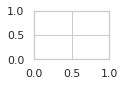

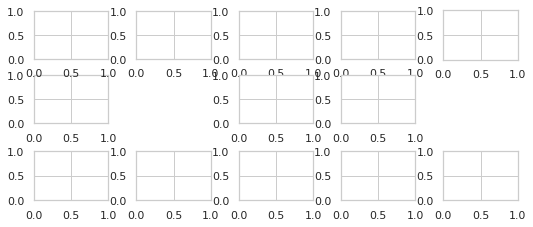

In [2]:
layout = fifi.svg_to_axes.FigureLayout('../../../Figure/fig4.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

## Raw Signal

In [3]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyMASigned.h5")

In [4]:
r = [1073.5,1074.5]

In [5]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyMASigned.h5")

ax=layout.axes[('rawodorfig','rawodor')]
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
ax.axvspan(xmin=1073.65,xmax= 1073.72,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
ax.axvspan(xmin=1074.01,xmax= 1074.05,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
ax.axvspan(xmin=1074.16,xmax= 1074.28,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
ax.axvspan(xmin=1073.72,xmax= 1074.01,ymin=0,ymax=0.41,  alpha=0.2, color='purple')
ax.axvspan(xmin=1074.08,xmax= 1074.16,ymin=0,ymax=0.41,  alpha=0.2, color='purple')
ax.axvspan(xmin=1074.38,xmax= 1074.5,ymin=0,ymax=0.41,  alpha=0.2, color='purple')

ax.set_xlim(r)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left': 5, 'bottom': 5}, 
                            smart_bounds=True,
                            xticks=[1073.5,1074.5],
                            yticks=[0,10],
                            linewidth=0.5)
ax.axhline(4.5, linestyle='--', c='red', linewidth=1)
ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['rawodorfig'], 'rawodorfig', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

## Odor Statistics Panels

### Whiff Duration

In [6]:
def get_index(df):
  
  idx = []
  for i in range(len(df.odor)):
      if (df.odor[i]>4.5):
          idx.append(df.index[i])

  from itertools import groupby
  from operator import itemgetter
  index = []
  for k, g in groupby(enumerate(idx),lambda ix : ix[0] - ix[1]):
      index.append((list((map(itemgetter(1), g)))))
  return index

index = get_index(df)

df['whiff_plot']=np.zeros(len(df))
df.whiff_plot[np.concatenate(index).ravel().tolist()]=0.5

/tmp/ipykernel_31268/1600383873.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.whiff_plot[np.concatenate(index).ravel().tolist()]=0.5


In [7]:
ax=layout.axes[('fig2','ele11')]
ax.axvspan(xmin=1073.65,xmax= 1073.72, alpha=0.2, color='green')
# ax.axvspan(xmin=1074.01,xmax= 1074.05,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
# ax.axvspan(xmin=1074.16,xmax= 1074.28,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.axhline(4.5, linestyle='--', c='red',linewidth=1)
ax.axis('off')
# mpl_functions.adjust_spines(ax,['bottom'],
#                             spine_locations={'bottom': 1}, 
#                             smart_bounds=True,
#                             xticks=[1073.5,1074.5],
                            
#                             linewidth=0.5)

# ax.set_xticklabels([0,1])
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [8]:
ax=layout.axes[('fig2','ele12')]
ax.axvspan(xmin=1073.65,xmax= 1073.72,  alpha=0.2, color='green')
ax.plot(df.time,df.whiff_plot, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [9]:
df1 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyStatsTime_std.h5")
ax=layout.axes[('fig2','wd03')]
ax.plot(df1.mean_time,df1.length_of_encounter, c='black', linewidth=0.6)
ax.axvspan(xmin=1073.65,xmax= 1073.70,  alpha=0.2, color='green')
ax.set_xlim(r)
ax.set_ylim(0,0.2)
ax.grid(False)
# ax.axis('off')
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1}, 
                            smart_bounds=True,
                            yticks=[0,0.2],
                            
                            linewidth=0.5)


figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Concentration

In [10]:
df = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyMASigned.h5")

ax=layout.axes[('fig2','ele13')]
ax.axvspan(xmin=1073.65,xmax= 1073.72,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
# ax.axvspan(xmin=1074.01,xmax= 1074.05,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
# ax.axvspan(xmin=1074.16,xmax= 1074.28,ymin=0.42,ymax=0.97,  alpha=0.2, color='green')
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.axhline(4.5, linestyle='--', c='red',linewidth=1)
ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [11]:
df1 = pd.read_hdf("~/DataAnalysis/data/Sprints/HighRes/Windy/WindyStatsTime_std.h5")

ax=layout.axes[('fig2','wc03')]
ax.plot(df1.mean_time,df1.mean_concentration, c='black', linewidth=0.6)
ax.axvspan(xmin=1073.65,xmax= 1073.70,  alpha=0.2, color='green')
ax.set_xlim(r)
ax.set_ylim(5,10)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1}, 
                            smart_bounds=True,                         
                            yticks=[5,10],
                            linewidth=0.5)


ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Frequency

In [12]:
ax=layout.axes[('fig2','ele15')]
ax.plot(df.time,df.efreq, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [13]:
ax=layout.axes[('fig2','ele16')]
ax.plot(df.time,df.encounter_frequency, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [14]:
ax=layout.axes[('fig2','wf03')]
ax.plot(df1.mean_time,df1.mean_ef, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.set_ylim(0,4)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1}, 
                            smart_bounds=True,
#                          
                            yticks=[0,4],
                            linewidth=0.5)
ax.grid(False)

ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Moving Average

In [15]:
ax=layout.axes[('fig2','ele17')]
ax.axvspan(xmin=1074,xmax= 1075,  alpha=0.3, color='b')
ax.axvspan(xmin=1074.1,xmax= 1075, alpha=0.5, color='r')
ax.axvspan(xmin=1074.2,xmax= 1075, alpha=0.3, color='black')
ax.axvspan(xmin=1074.3,xmax= 1075, alpha=0.2, color='g')
ax.plot(df.time,df.odor, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)

ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [16]:
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=200)
ma = df.odor.rolling(window=indexer, min_periods=1).mean()


ax=layout.axes[('fig2','ele18')]
# ax.axvspan(xmin=361,xmax= 362, ymin=0,ymax=0.6, alpha=0.2, color='g')
# ax.axvspan(xmin=362,xmax= 363, ymin=0,ymax=0.6,alpha=0.2, color='r')
ax.plot(df.time,ma, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.set_ylim(0,6)
ax.grid(False)

# mpl_functions.adjust_spines(ax,['left'],
#                             spine_locations={'left': 1}, 
#                             smart_bounds=True,
#                             yticks=[0,6],
#                             linewidth=0.5)

ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')


In [17]:
ax=layout.axes[('fig2','wma03')]
# ax.axvspan(xmin=361,xmax= 362,  alpha=0.2, color='g')
# ax.axvspan(xmin=362,xmax= 363, alpha=0.2, color='r')
ax.plot(df1.mean_time,df1.whiff_ma, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.set_ylim(0,5)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1}, 
                            smart_bounds=True,
                            yticks=[0,5],
                            linewidth=0.5)


ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

### Whiff Std Dev

In [18]:
ax=layout.axes[('fig2','std01')]

ax.plot(df.time,df.odor, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.grid(False)
ax.axhline(4.5, linestyle='--', c='red',linewidth=1)
ax.axvspan(xmin=1074.01,xmax= 1074.05,ymin=0.42,ymax=0.97,  alpha=0.3, color='green')
ax.axis('off')
ax.set_rasterization_zorder(-20)
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [19]:
ax=layout.axes[('fig2','std03')]

ax.plot(df1.mean_time,df1.std_whiff, c='black', linewidth=0.6)
ax.set_xlim(r)
ax.set_ylim(0,2.5)
ax.axvspan(xmin=1074.01,xmax= 1074.05,alpha=0.3, color='green')
mpl_functions.adjust_spines(ax,['left'],
                            spine_locations={'left': 1}, 
                            smart_bounds=True,
                            yticks=[0,2.5],
                            linewidth=0.5)
ax.set_rasterization_zorder(-20)
ax.grid(False)

figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../../Figure/fig4.svg')

In [21]:
import cairosvg
cairosvg.svg2pdf(url='../../../Figure/fig4.svg', write_to='../../../Figure/fig4.pdf')